In [1]:
from  sklearn.cluster import KMeans
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data=pd.read_csv('Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [3]:
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


<Axes: >

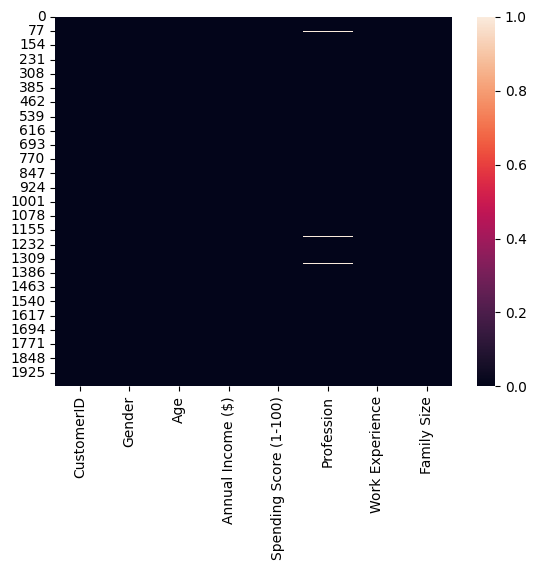

In [5]:
sns.heatmap(data.isna())

In [6]:
data.shape

(2000, 8)

In [7]:
data.size

16000

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(1965, 8)

In [10]:
data['Gender'].value_counts()

Gender
Female    1166
Male       799
Name: count, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

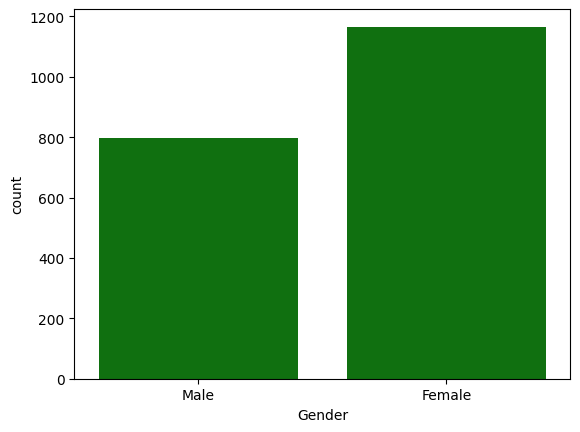

In [11]:
sns.countplot(x=data['Gender'],color='g')

In [12]:
# Now converting the catogorical data into the integers 
data['Gender']=data['Gender'].map({'Male':1 , 'Female':0})

In [13]:
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,Healthcare,1,4
1,2,1,21,35000,81,Engineer,3,3
2,3,0,20,86000,6,Engineer,1,1
3,4,0,23,59000,77,Lawyer,0,2
4,5,0,31,38000,40,Entertainment,2,6


In [14]:
data.drop('CustomerID',axis=1,inplace=True)

In [15]:
data.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,19,15000,39,Healthcare,1,4
1,1,21,35000,81,Engineer,3,3


In [16]:

data=pd.get_dummies(data=data,columns=['Profession'],dtype=int)
data.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,0,0,0,0,0,1,0,0,0
1,1,21,35000,81,3,3,0,0,1,0,0,0,0,0,0


In [17]:
wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init="k-means++",random_state=42)
    model.fit(data)
    wcss.append(model.inertia_)
wcss    

[4125861905074.11,
 1134885143618.3938,
 587085182654.3025,
 357969843022.49,
 213999178681.1012,
 137989944323.42648,
 106851436073.79399,
 82716835125.41513,
 64713917411.23072,
 52821382502.96411]

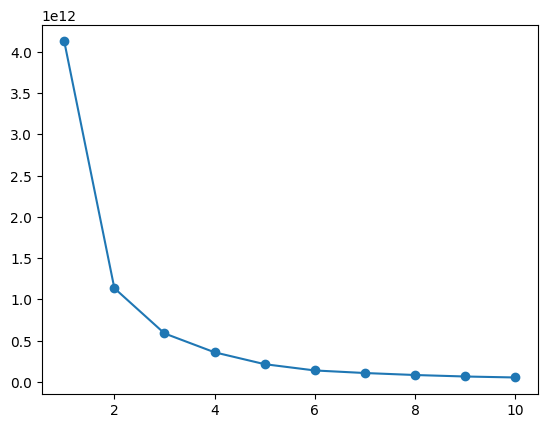

In [18]:

plt.plot(range(1,11),wcss,marker='o')


In [19]:
model=KMeans(n_clusters=5,init="k-means++",random_state=42)
model.fit_predict(data)

array([2, 2, 1, ..., 1, 0, 1])

In [20]:
data.head(2)

,Gender,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,0,0,0,0,0,1,0,0,0
1,1,21,35000,81,3,3,0,0,1,0,0,0,0,0,0


In [21]:
from sklearn.decomposition import PCA
model1=PCA(n_components=2)

In [22]:
df=model1.fit_transform(data)

In [23]:
df=pd.DataFrame(df)

In [24]:
df['label']=model.fit_predict(data)
df[0]

0      -95616.010254
1      -75616.009537
2      -24616.010810
3      -51616.009609
4      -72616.010072
            ...     
1960    73770.990462
1961   -37458.009386
1962   -19655.009741
1963    71492.989927
1964       -6.009118
Name: 0, Length: 1965, dtype: float64

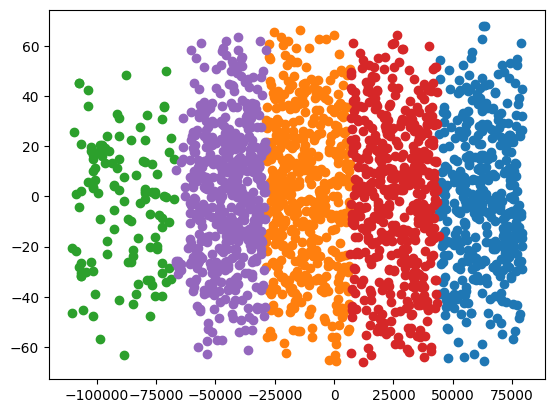

In [25]:
plt.scatter(df[0][df['label']==0],df[1][df['label']==0])
plt.scatter(df[0][df['label']==1],df[1][df['label']==1])
plt.scatter(df[0][df['label']==2],df[1][df['label']==2])
plt.scatter(df[0][df['label']==3],df[1][df['label']==3])
plt.scatter(df[0][df['label']==4],df[1][df['label']==4])
